<a href="https://colab.research.google.com/github/your-repo/MeanShift_Final_Visualized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Step 1: Import Libraries & Set Seed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift
import kagglehub
import os

seed = 0
np.random.seed(seed)

##  Step 2: Define Custom MeanShift Algorithm

In [3]:
class MeanShiftCustom:
    def __init__(self, bandwidth=1.0, max_iter=300, epsilon=1e-3):
        self.bandwidth = bandwidth
        self.max_iter = max_iter
        self.epsilon = epsilon

    def fit(self, X):
        n_samples, n_features = X.shape
        points = np.copy(X)
        for _ in range(self.max_iter):
            new_points = np.copy(points)
            for i in range(n_samples):
                distances = np.linalg.norm(points - points[i], axis=1)
                neighbors = points[distances < self.bandwidth]
                if len(neighbors) > 0:
                    new_points[i] = np.mean(neighbors, axis=0)
            shift = np.linalg.norm(new_points - points, axis=1).max()
            points = new_points
            if shift < self.epsilon:
                break
        cluster_centers = []
        labels = np.zeros(n_samples, dtype=int)
        for i, point in enumerate(points):
            assigned = False
            for j, center in enumerate(cluster_centers):
                if np.linalg.norm(point - center) < self.bandwidth * 0.5:
                    labels[i] = j
                    assigned = True
                    break
            if not assigned:
                cluster_centers.append(point)
                labels[i] = len(cluster_centers) - 1
        self.cluster_centers_ = np.array(cluster_centers)
        self.labels_ = labels
        return self

## Step 3: Iris Dataset

In [4]:
path = kagglehub.dataset_download("himanshunakrani/iris-dataset")
iris = pd.read_csv(os.path.join(path, "iris.csv"))
iris = iris.dropna()
X = iris.drop(columns=['species'])
y = iris['species']

100%|██████████| 0.98k/0.98k [00:00<00:00, 228kB/s]

Extracting files...


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df = X.copy()
df['target'] = y

###  Visualize Original Data - Iris

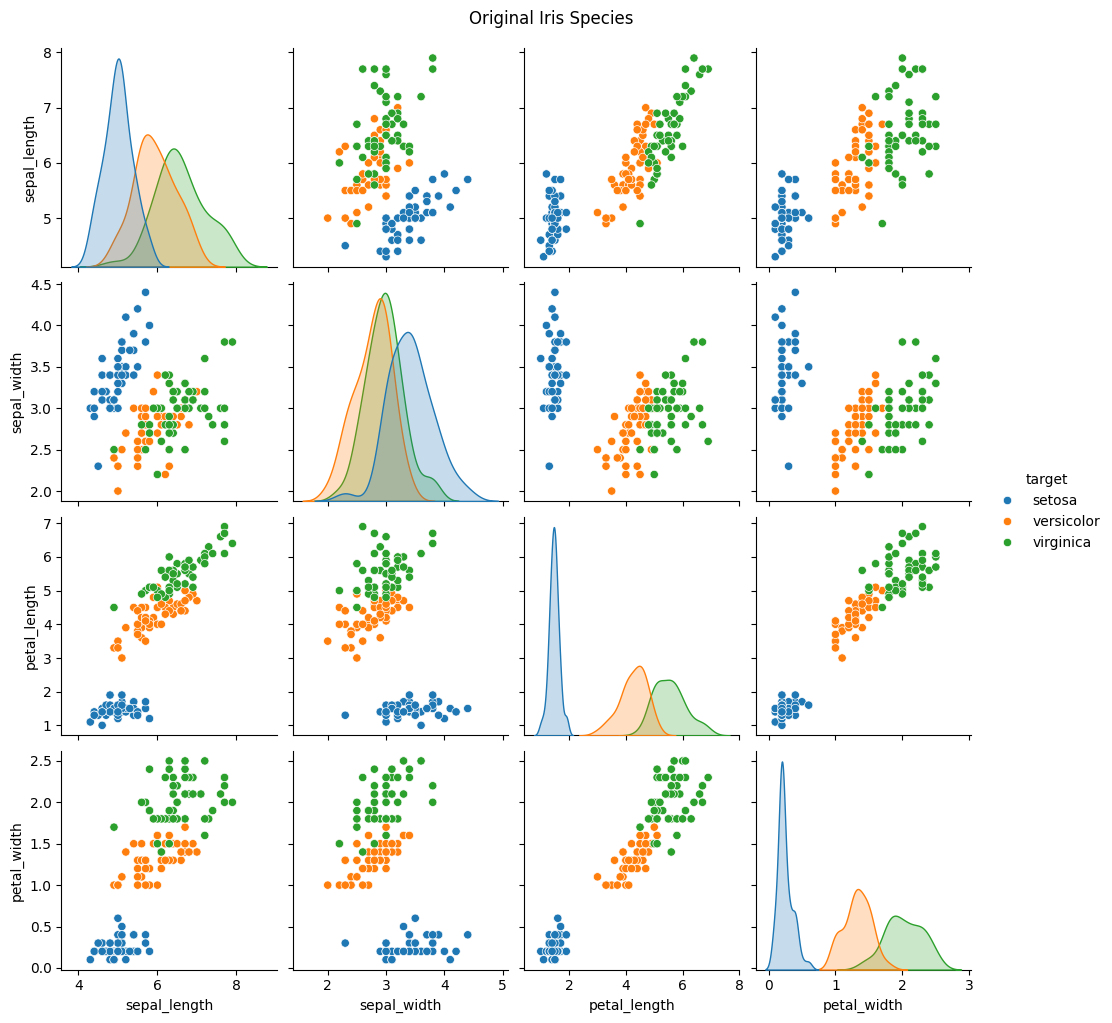

In [6]:
sns.pairplot(df, hue='target')
plt.suptitle('Original Iris Species', y=1.02)
plt.show()

###  Sklearn MeanShift - Iris

In [7]:
ms = MeanShift()
ms.fit(X_scaled)
df['sklearn_ms'] = ms.labels_

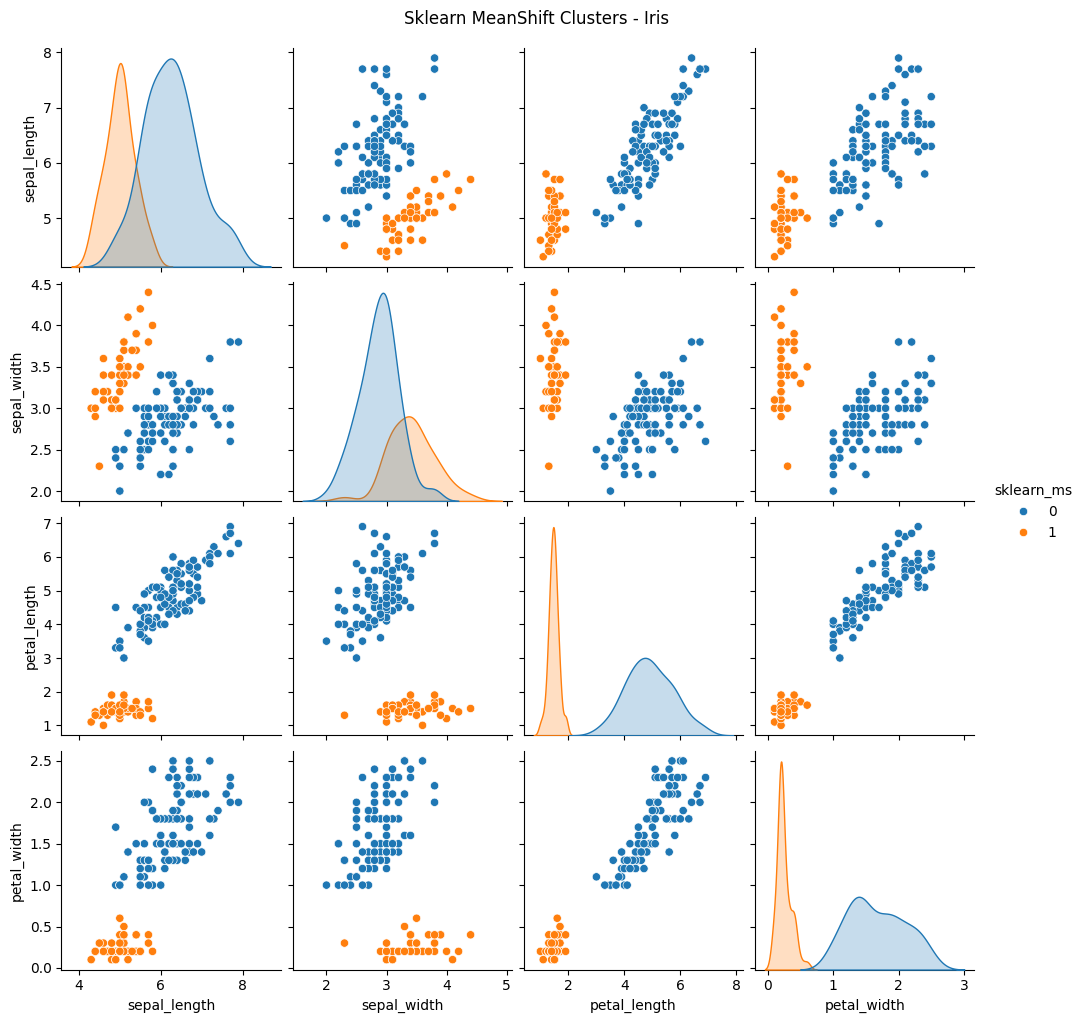

In [8]:
sns.pairplot(df, hue='sklearn_ms')
plt.suptitle('Sklearn MeanShift Clusters - Iris', y=1.02)
plt.show()

###  Custom MeanShift - Iris

In [9]:
ms_custom = MeanShiftCustom(bandwidth=1.0)
ms_custom.fit(X_scaled)
df['custom_ms'] = ms_custom.labels_

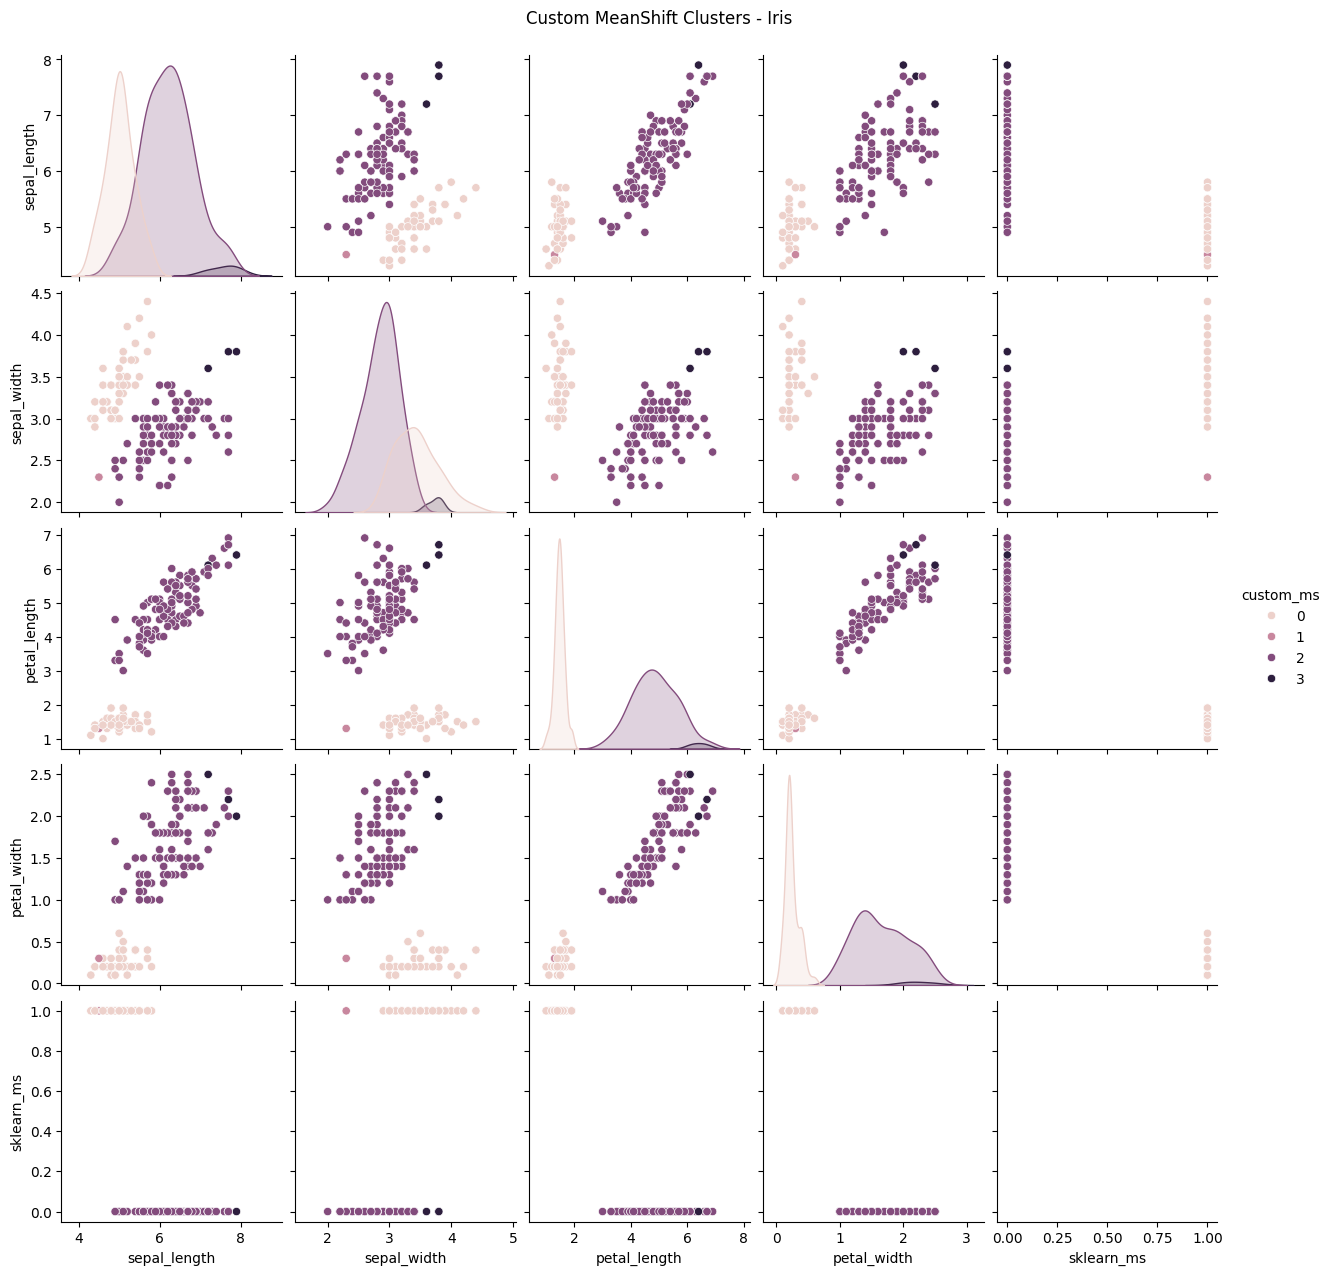

In [10]:
sns.pairplot(df, hue='custom_ms')
plt.suptitle('Custom MeanShift Clusters - Iris', y=1.02)
plt.show()

In [11]:
iris_score_sklearn = silhouette_score(X_scaled, ms.labels_)
iris_score_custom = silhouette_score(X_scaled, ms_custom.labels_)
print(f'Silhouette Score (Sklearn - Iris): {iris_score_sklearn:.3f}')
print(f'Silhouette Score (Custom - Iris): {iris_score_custom:.3f}')

Silhouette Score (Sklearn - Iris): 0.580
Silhouette Score (Custom - Iris): 0.406


##  Step 3: AI Index Dataset

In [12]:
path = kagglehub.dataset_download("katerynameleshenko/ai-index")
ai = pd.read_csv(os.path.join(path, "AI_index_db.csv"))
ai = ai.dropna()
X = ai.select_dtypes(include='number').drop(columns=['Total score'])

100%|██████████| 2.38k/2.38k [00:00<00:00, 3.65MB/s]

Extracting files...


In [13]:
X_scaled = StandardScaler().fit_transform(X)
df = X.copy()

###  Sklearn MeanShift - AI Index

In [15]:
ms = MeanShift()
ms.fit(X_scaled)
df['sklearn_ms'] = ms.labels_

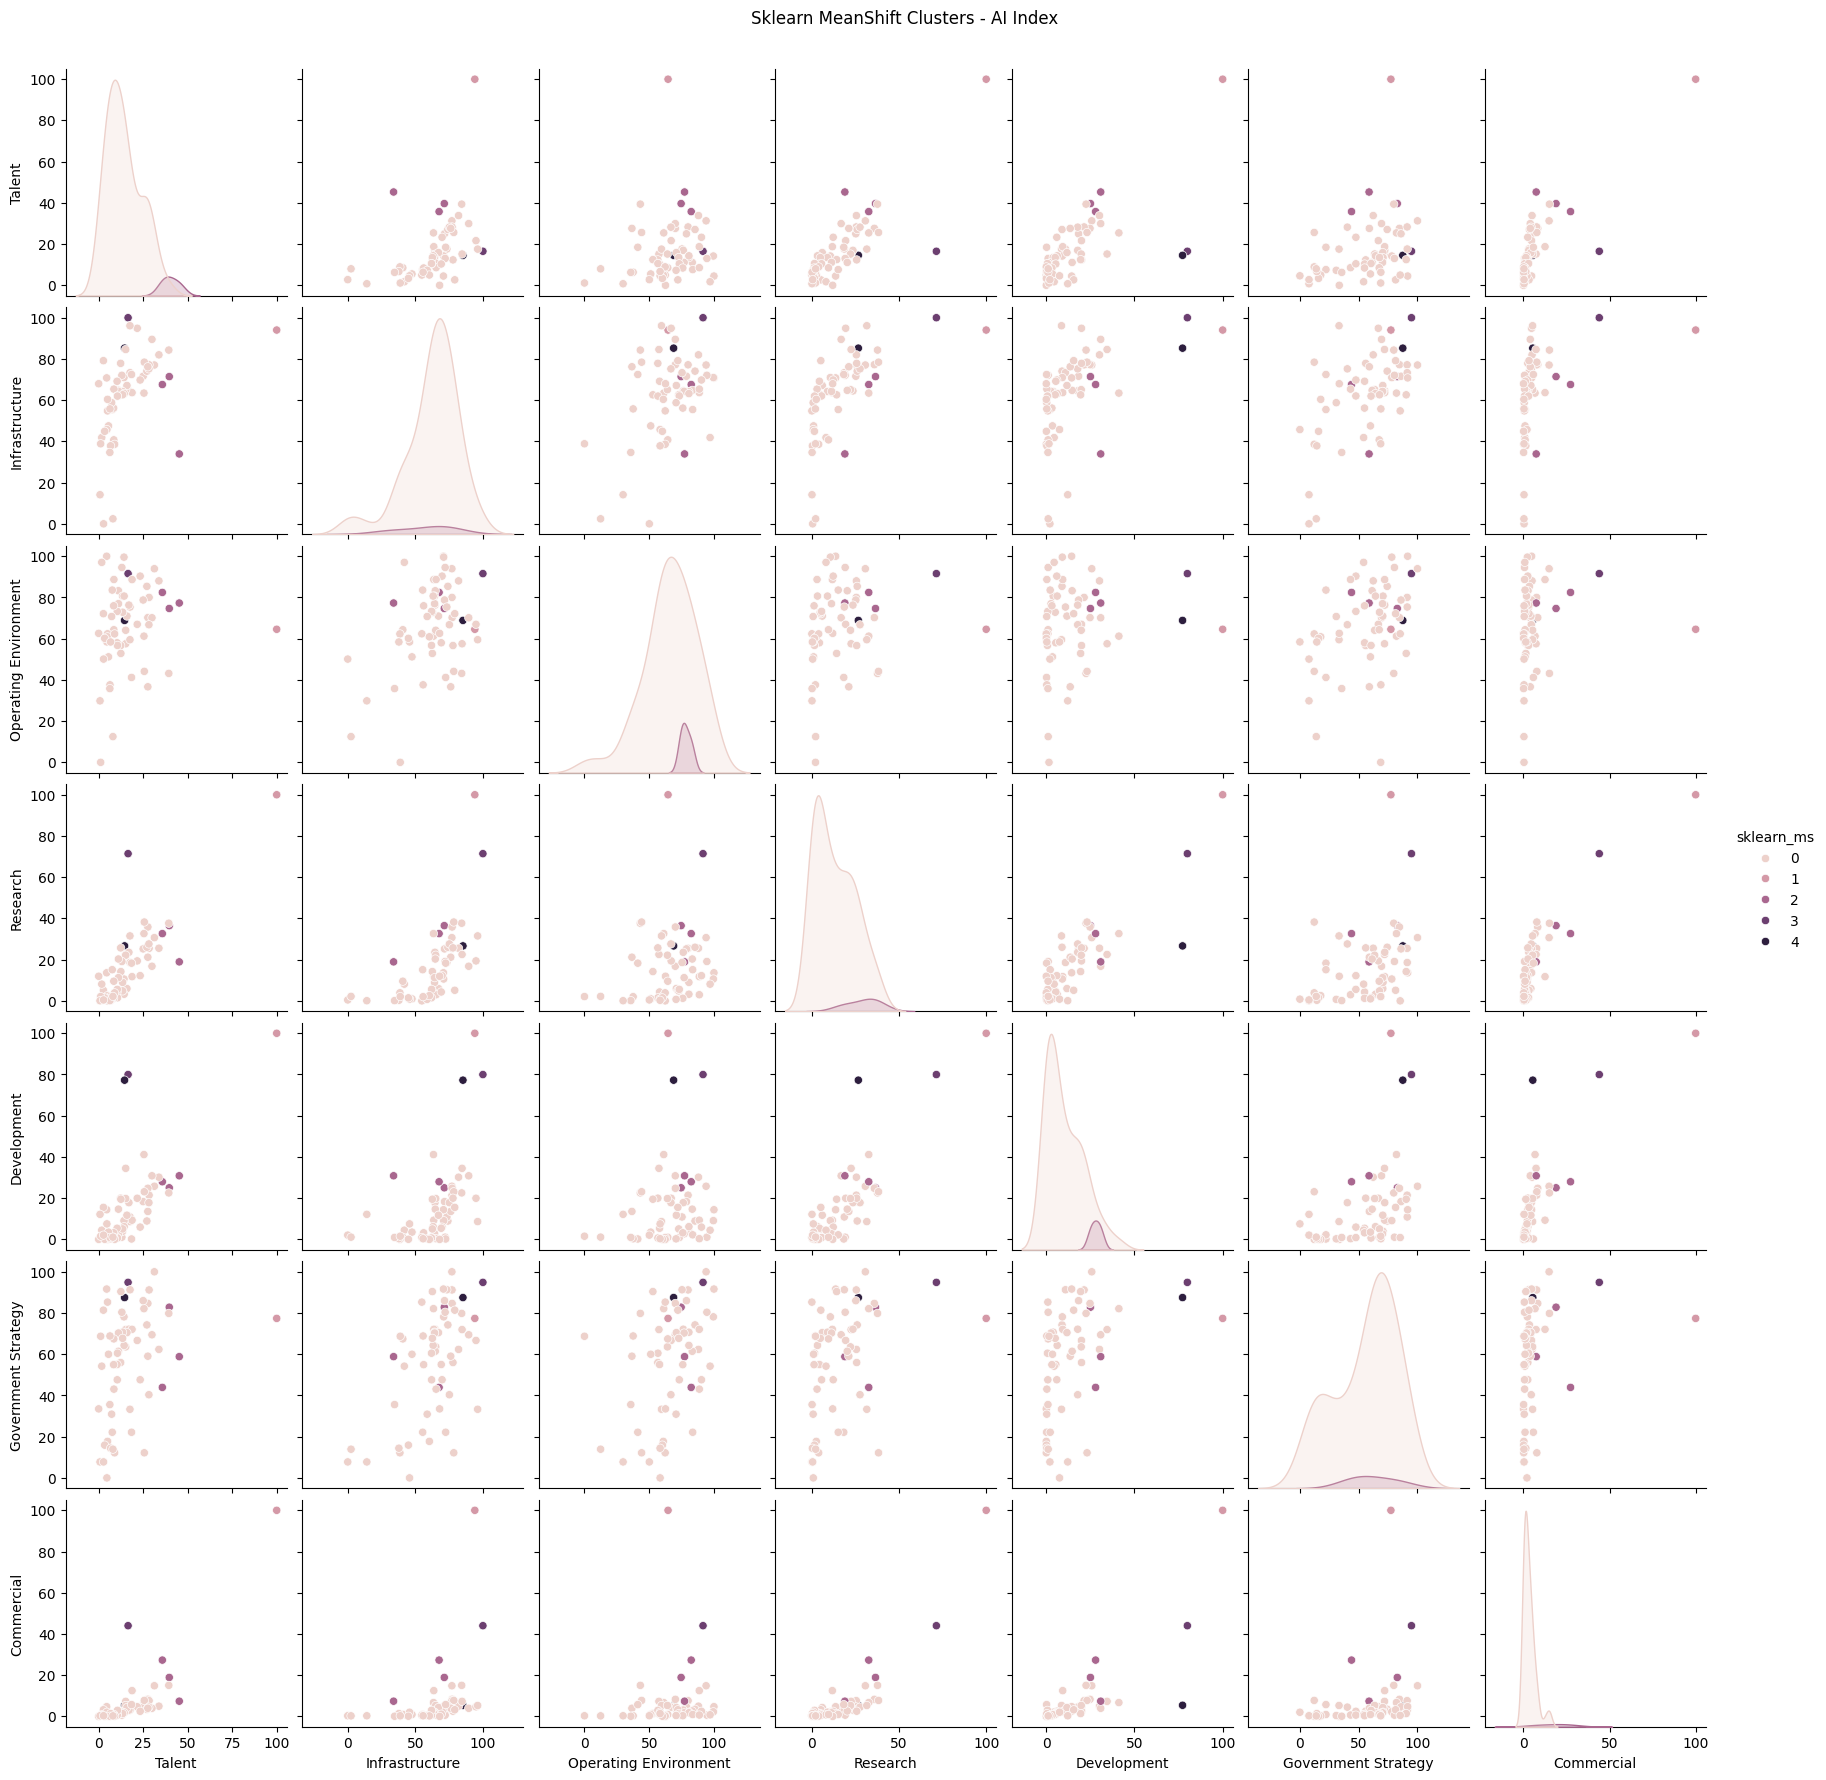

In [16]:
sns.pairplot(df, hue='sklearn_ms')
plt.suptitle('Sklearn MeanShift Clusters - AI Index', y=1.02)
plt.show()

###  Custom MeanShift - AI Index

In [18]:
ms_custom = MeanShiftCustom().fit(X_scaled)
df['custom_ms'] = ms_custom.labels_

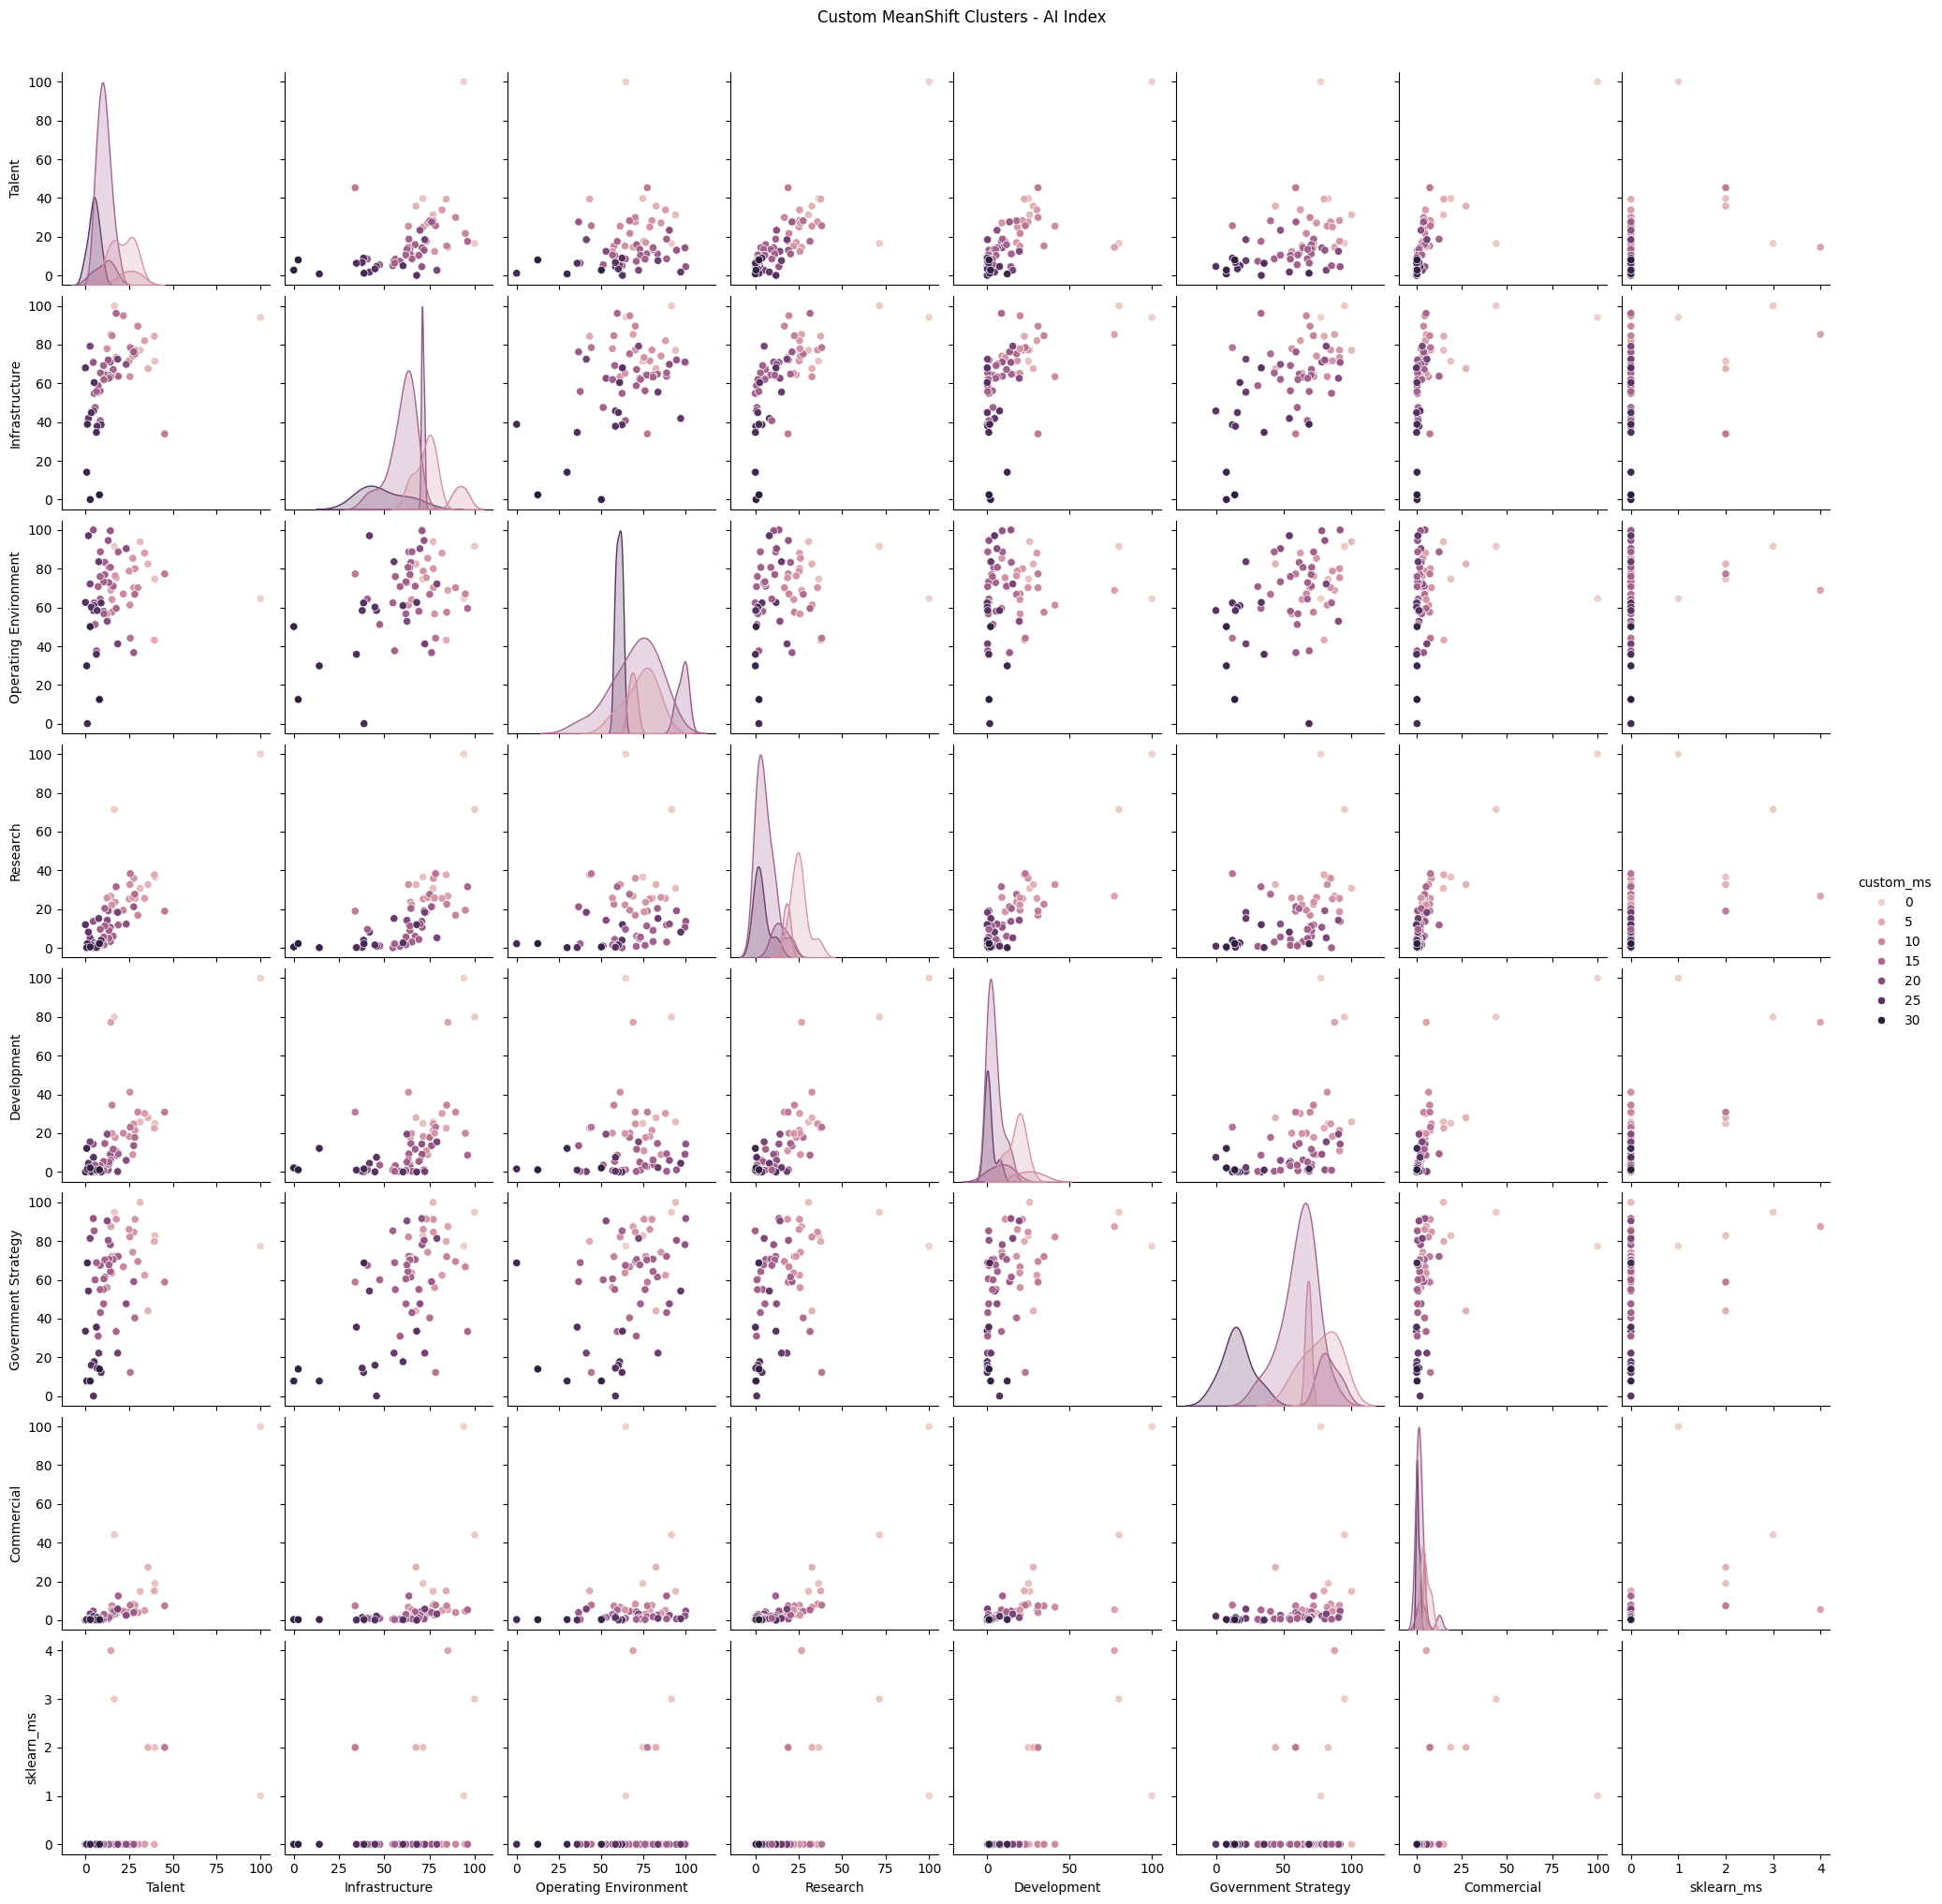

In [19]:
sns.pairplot(df, hue='custom_ms')
plt.suptitle('Custom MeanShift Clusters - AI Index', y=1.02)
plt.show()

In [20]:
ai_score_sklearn = silhouette_score(X_scaled, ms.labels_)
ai_score_custom = silhouette_score(X_scaled, ms_custom.labels_)
print(f'Silhouette Score (Sklearn - AI Index): {ai_score_sklearn:.3f}')
print(f'Silhouette Score (Custom - AI Index): {ai_score_custom:.3f}')

Silhouette Score (Sklearn - AI Index): 0.177
Silhouette Score (Custom - AI Index): 0.057


##  Step 3: Earthquake Dataset

In [21]:
path = kagglehub.dataset_download("shreyasur965/recent-earthquakes")
quake = pd.read_csv(os.path.join(path, "earthquakes.csv"))
X = quake.select_dtypes(include='number').dropna(axis=1)

100%|██████████| 214k/214k [00:00<00:00, 61.3MB/s]

Extracting files...


In [22]:
X_scaled = StandardScaler().fit_transform(X)
df = X.copy()

###  Sklearn MeanShift - Earthquake

In [24]:
ms = MeanShift().fit(X_scaled)
df['sklearn_ms'] = ms.labels_

In [25]:
sns.pairplot(df, hue='sklearn_ms')
plt.suptitle('Sklearn MeanShift Clusters - Earthquake', y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### ⚙️ Custom MeanShift - Earthquake

In [26]:
ms_custom = MeanShiftCustom().fit(X_scaled)
df['custom_ms'] = ms_custom.labels_

In [27]:
sns.pairplot(df, hue='custom_ms')
plt.suptitle('Custom MeanShift Clusters - Earthquake', y=1.02)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [28]:
q_score_sklearn = silhouette_score(X_scaled, ms.labels_)
q_score_custom = silhouette_score(X_scaled, ms_custom.labels_)
print(f'Silhouette Score (Sklearn - Earthquakes): {q_score_sklearn:.3f}')
print(f'Silhouette Score (Custom - Earthquakes): {q_score_custom:.3f}')

Silhouette Score (Sklearn - Earthquakes): 0.209
Silhouette Score (Custom - Earthquakes): 0.454


##  Step 4: Summary of Silhouette Scores

In [29]:
summary_df = pd.DataFrame({
    'Dataset': ['Iris', 'AI Index', 'Earthquakes'],
    'Sklearn Score': [iris_score_sklearn, ai_score_sklearn, q_score_sklearn],
    'Custom Score': [iris_score_custom, ai_score_custom, q_score_custom]
})
summary_df

,Dataset,Sklearn Score,Custom Score
0,Iris,0.580184,0.405684
1,AI Index,0.177396,0.056685
2,Earthquakes,0.208731,0.453921
